In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [2]:
df1 = pd.read_csv('../data/aim_prices.csv', index_col=0)
df2 = df1[df1['symbol'] == 'LTG']
df2[df2['Adj Close'].isnull()]

,Date,Open,High,Low,Close,Adj Close,Volume,symbol
18688,2020-07-20,NaN,NaN,NaN,NaN,NaN,NaN,LTG


In [3]:
df2.loc[18683:18693, :]

,Date,Open,High,Low,Close,Adj Close,Volume,symbol
18683,2020-07-13,127.800003,127.800003,121.500000,121.699997,121.699997,427900.0,LTG
18684,2020-07-14,127.800003,127.800003,115.099998,117.699997,117.699997,1454145.0,LTG
18685,2020-07-15,123.599998,123.900002,117.444000,122.500000,122.500000,1248057.0,LTG
18686,2020-07-16,118.099998,122.500000,118.099998,120.000000,120.000000,486937.0,LTG
18687,2020-07-17,125.000000,125.000000,118.000000,120.000000,120.000000,602661.0,LTG
18688,2020-07-20,NaN,NaN,NaN,NaN,NaN,NaN,LTG
18689,2020-07-21,121.000000,124.500000,119.000000,123.400002,123.400002,1758919.0,LTG
18690,2020-07-22,1.231000,1.256000,1.224790,1.236000,1.236000,475677.0,LTG
18691,2020-07-23,124.300003,129.399994,121.300003,129.000000,129.000000,3288818.0,LTG
18692,2020-07-24,127.000000,127.286003,124.000000,125.800003,125.800003,1691881.0,LTG


In [4]:
df3 = df2.fillna(method='ffill')
df3.loc[18683:18693, :]

,Date,Open,High,Low,Close,Adj Close,Volume,symbol
18683,2020-07-13,127.800003,127.800003,121.500000,121.699997,121.699997,427900.0,LTG
18684,2020-07-14,127.800003,127.800003,115.099998,117.699997,117.699997,1454145.0,LTG
18685,2020-07-15,123.599998,123.900002,117.444000,122.500000,122.500000,1248057.0,LTG
18686,2020-07-16,118.099998,122.500000,118.099998,120.000000,120.000000,486937.0,LTG
18687,2020-07-17,125.000000,125.000000,118.000000,120.000000,120.000000,602661.0,LTG
18688,2020-07-20,125.000000,125.000000,118.000000,120.000000,120.000000,602661.0,LTG
18689,2020-07-21,121.000000,124.500000,119.000000,123.400002,123.400002,1758919.0,LTG
18690,2020-07-22,1.231000,1.256000,1.224790,1.236000,1.236000,475677.0,LTG
18691,2020-07-23,124.300003,129.399994,121.300003,129.000000,129.000000,3288818.0,LTG
18692,2020-07-24,127.000000,127.286003,124.000000,125.800003,125.800003,1691881.0,LTG


<AxesSubplot:>

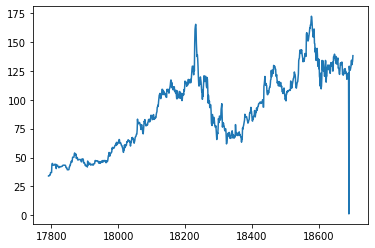

In [5]:
df3['Adj Close'].plot()

In [8]:
df4 = pd.DataFrame()
df4[['ds', 'y']] = df3[['Date', 'Adj Close']]
df4

,ds,y
17792,2017-01-03,34.012775
17793,2017-01-04,34.012775
17794,2017-01-05,34.505714
17795,2017-01-06,34.505714
17796,2017-01-09,34.998657
...,...,...
18698,2020-08-03,134.199997
18699,2020-08-04,130.300003
18700,2020-08-05,131.899994
18701,2020-08-06,133.399994


In [10]:
m = Prophet()
m.fit(df4)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
future = m.make_future_dataframe(periods=60)
future.tail(20)

,ds
951,2020-09-17
952,2020-09-18
953,2020-09-19
954,2020-09-20
955,2020-09-21
956,2020-09-22
957,2020-09-23
958,2020-09-24
959,2020-09-25
960,2020-09-26


In [18]:
forecast = m.predict(future)
forecast.tail(20)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
951,2020-09-17,131.941605,124.525191,149.099585,130.441169,133.376019,4.909216,4.909216,4.909216,0.632709,0.632709,0.632709,4.276506,4.276506,4.276506,0.0,0.0,0.0,136.850820
952,2020-09-18,131.954546,125.409924,149.549709,130.377424,133.460885,5.335363,5.335363,5.335363,0.634349,0.634349,0.634349,4.701014,4.701014,4.701014,0.0,0.0,0.0,137.289909
953,2020-09-19,131.967488,124.077531,148.194140,130.342076,133.523978,4.130058,4.130058,4.130058,-0.994405,-0.994405,-0.994405,5.124462,5.124462,5.124462,0.0,0.0,0.0,136.097545
954,2020-09-20,131.980429,125.076993,148.217711,130.291359,133.616410,4.542307,4.542307,4.542307,-0.994404,-0.994404,-0.994404,5.536711,5.536711,5.536711,0.0,0.0,0.0,136.522736
955,2020-09-21,131.993370,127.649241,150.525060,130.229660,133.745555,6.135052,6.135052,6.135052,0.207734,0.207734,0.207734,5.927317,5.927317,5.927317,0.0,0.0,0.0,138.128422
956,2020-09-22,132.006312,126.813778,150.540751,130.167090,133.853636,6.922238,6.922238,6.922238,0.636460,0.636460,0.636460,6.285778,6.285778,6.285778,0.0,0.0,0.0,138.928550
957,2020-09-23,132.019253,126.497712,151.789820,130.116259,133.927458,6.479342,6.479342,6.479342,-0.122444,-0.122444,-0.122444,6.601785,6.601785,6.601785,0.0,0.0,0.0,138.498595
958,2020-09-24,132.032195,126.932050,153.130591,130.065511,134.004843,7.498193,7.498193,7.498193,0.632709,0.632709,0.632709,6.865484,6.865484,6.865484,0.0,0.0,0.0,139.530388
959,2020-09-25,132.045136,126.930036,152.012270,130.018038,134.096558,7.702070,7.702070,7.702070,0.634349,0.634349,0.634349,7.067721,7.067721,7.067721,0.0,0.0,0.0,139.747206
960,2020-09-26,132.058077,126.074632,151.232848,129.970564,134.174838,6.205885,6.205885,6.205885,-0.994405,-0.994405,-0.994405,7.200290,7.200290,7.200290,0.0,0.0,0.0,138.263962


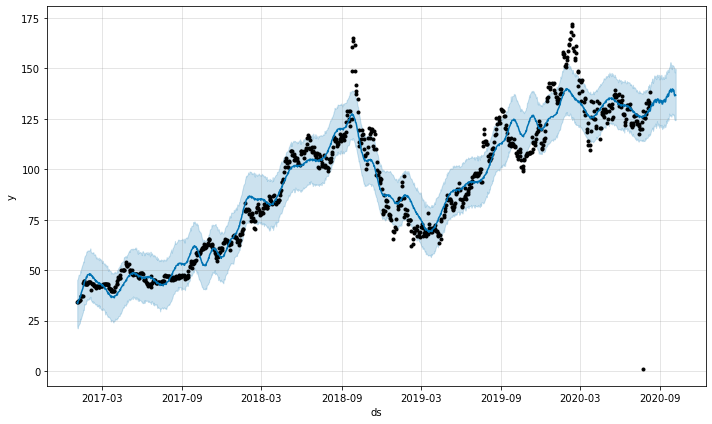

In [19]:
fig1 = m.plot(forecast)

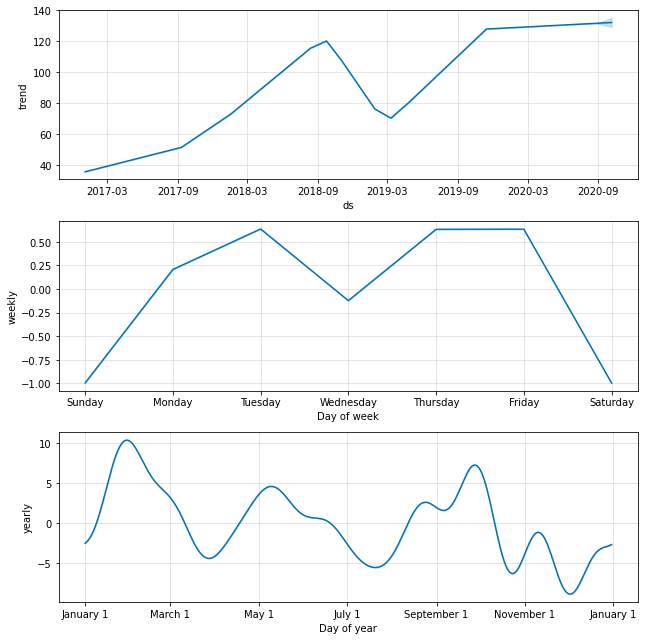

In [20]:
fig2 = m.plot_components(forecast)